# Intro to Plotting and Fitting

In [1]:
import qexpy as q
import qexpy.plotting as plt

The plotting module of QExPy is a wrapper for matplotlib.pyplot, developed to interface with QExPy data structures.

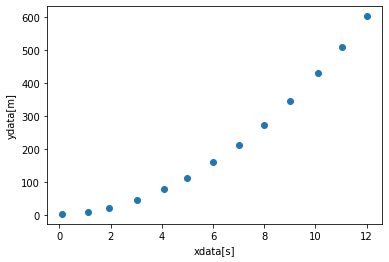

In [2]:
# let's start by creating some arrays of measurement
xdata = q.MeasurementArray([0.11,1.12,1.93,3.01,4.09,4.98,6.01,7,7.98,9.01,10.1,11.02,12], 
                           error=0.05, unit="s", name="xdata")
ydata = q.MeasurementArray([3.27, 10.26, 21.76, 45.25, 78.1, 112.16, 159.51, 213, 273.69, 345.74, 
                            431.24, 510.81, 603], relative_error=0.1, unit="m", name="ydata")

# now we can add them to a simple plot
figure = q.plot(xdata, ydata)
figure.show()

As you can see in the plot above, the name and units of the data that's passed in are automatically added to the plot as axis labels.

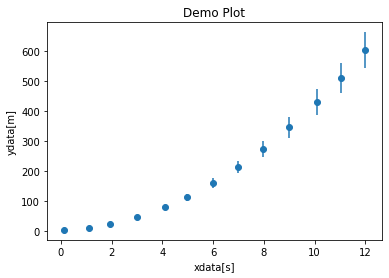

In [3]:
# we can also add error bars to the plot
figure.error_bars()

# we can add a title to the plot
figure.title = "Demo Plot"

# finally draw the plot
figure.show()